In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import roc_curve, accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [22]:
rawdata = pd.read_excel('Iris.xlsx') #Adjust the path
nrow, ncol = rawdata.shape

predictors = rawdata.iloc[:, :ncol - 1]
print(predictors)

target = rawdata.iloc[:, -1]
print(target)


     sepal_len  sepal_wid  petal_len  petal_wid
0          5.1        3.5        1.4        0.2
1          4.9        3.0        1.4        0.2
2          4.7        3.2        1.3        0.2
3          4.6        3.1        1.5        0.2
4          5.0        3.6        1.4        0.2
..         ...        ...        ...        ...
145        6.7        3.0        5.2        2.3
146        6.3        2.5        5.0        1.9
147        6.5        3.0        5.2        2.0
148        6.2        3.4        5.4        2.3
149        5.9        3.0        5.1        1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64


In [23]:
#Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, stratify=target, test_size=.3)

In [25]:
gnb = GaussianNB() #suitable for numeric features

#Use ravel() functions to return contiguous flattened array :https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
#Train your model using train set
#gnb.fit(X_train, np.ravel(y_train,order='C')) 

gnb.fit(X_train, y_train)

# Fit your model to test set to make prediction
predictions = gnb.predict(X_test)
#calculate accuracy of your model using predicted vs actual value
print("Accuracy score of our model with Gaussian Naive Bayes:", accuracy_score(y_test, predictions))

print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (y_test != predictions).sum()))

Accuracy score of our model with Gaussian Naive Bayes: 0.9777777777777777
Number of mislabeled points out of a total 45 points : 1


Precision score of our model with GaussianNB: 0.9777777777777777
Recall score of our model with GaussianNB : 0.9777777777777777
AUC values of the decision tree 1.0


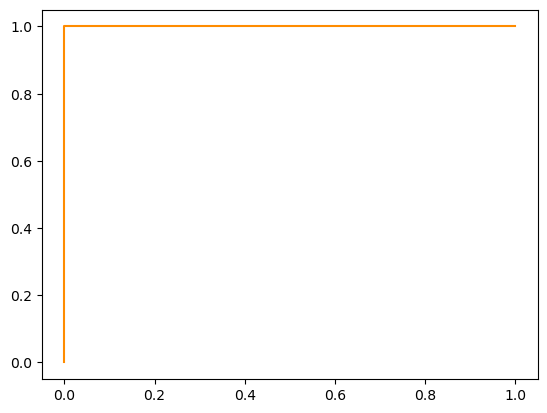

In [26]:
#Get more metrics for avaluating model performance
fpr = dict() # store false positive 
tpr = dict() # store the true positive rate 
roc_auc = dict()
prob = gnb.predict_proba(X_test)

precision = precision_score(y_true=y_test, y_pred=predictions, average='micro') 
print("Precision score of our model with GaussianNB:", precision) 

recall = recall_score(y_true=y_test, y_pred=predictions, average='micro') 
print("Recall score of our model with GaussianNB :", recall) 

for x in range(3): 
 fpr[x], tpr[x], _ = roc_curve(y_test[:], prob[:, x],pos_label=x) 
    
roc_auc[x] = auc(fpr[x], tpr[x]) 
print("AUC values of the decision tree",roc_auc[x]) 

plt.plot(fpr[x], tpr[x], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[x]) 
plt.show() 

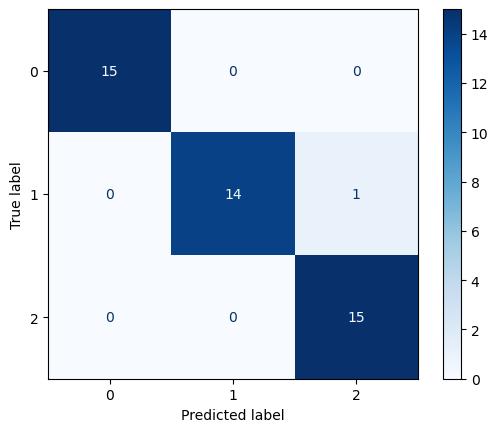

In [29]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, gnb.predict(X_test))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
#Multidimentional Naive Bayes
mnb = MultinomialNB() #optimized for nominal features but can work for numeric ones as well
mnb.fit(X_train, np.ravel(y_train,order='C')) 
predictions = mnb.predict(X_test) 
print("Accuracy score of our model with Multinomial Naive Bayes:", accuracy_score(y_test, predictions)) 

Accuracy score of our model with Multinomial Naive Bayes: 0.9777777777777777
